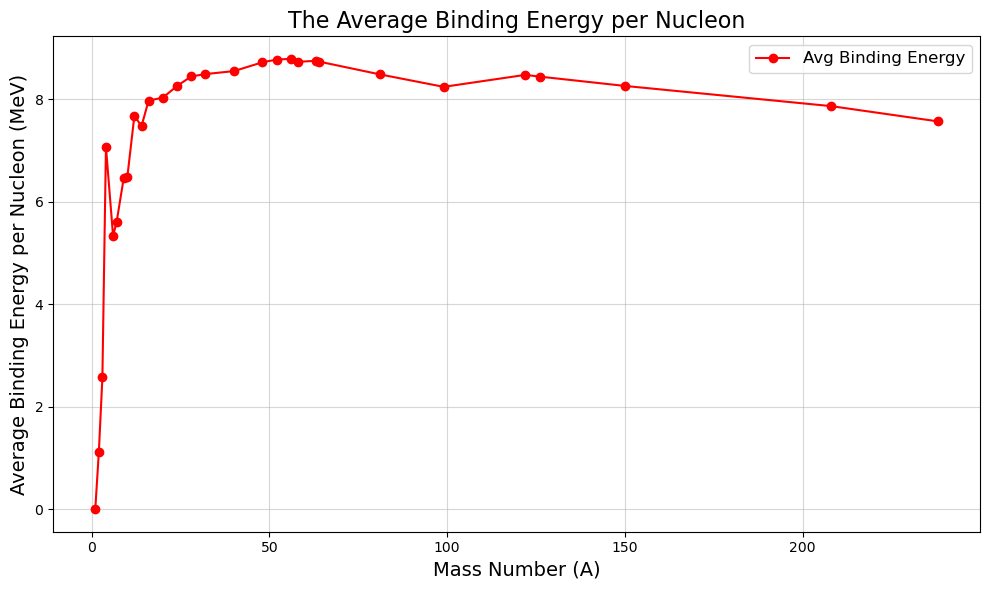

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = "python input sheet .xlsx"  
data = pd.read_excel(file_path)



# Extract relevant columns
A = data["A"]  # Mass number
binding_energy = data["BE"]  # Total binding energy in MeV



# Calculate the average binding energy per nucleon
avg_binding_energy = binding_energy / A

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(A, avg_binding_energy, marker="o", linestyle="-", color="r", label="Avg Binding Energy")    
plt.title("The Average Binding Energy per Nucleon", fontsize=16)
plt.xlabel("Mass Number (A)", fontsize=14)
plt.ylabel("Average Binding Energy per Nucleon (MeV)", fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()


# Save the graph to a file
plt.savefig("avg_binding_energy_vs_A.png", dpi=300)

# Show the graph
plt.show()


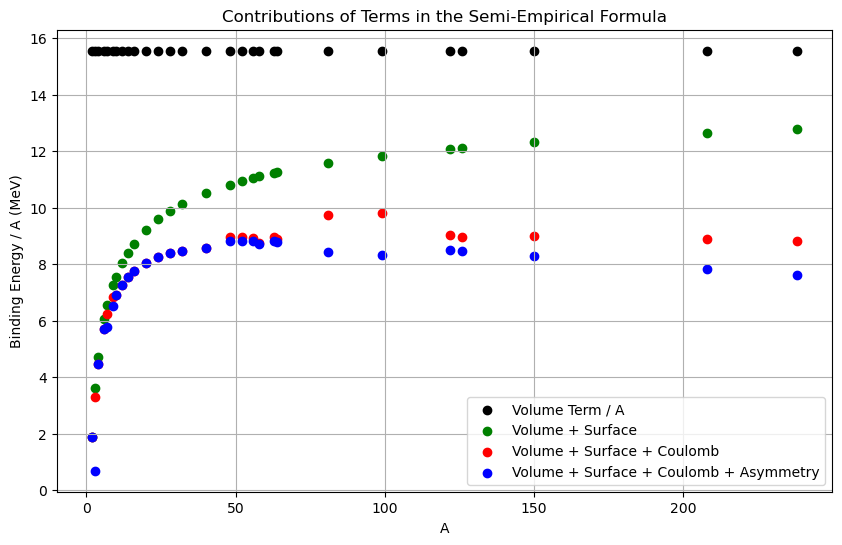

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants from the semi-empirical mass formula
a_v = 15.56  # Volume term constant (MeV)
a_s = 17.23  # Surface term constant (MeV)
a_c = 0.697  # Coulomb term constant (MeV)
a_a = 23.385  # Asymmetry term constant (MeV)

# Load the input data
file_path = "python input sheet  (3).xlsx"  
data = pd.read_excel(file_path)

# Extract relevant columns
A = data["A"]  # Mass number
Z = data["Z"]  # Atomic number

# Calculate neutron number
N = A - Z



# Calculate terms of the semi-empirical mass formula
volume_term = a_v * A
surface_term = a_s * A ** (2 / 3)
coulomb_term = a_c * Z * (Z - 1) / A ** (1 / 3)
symmetry_term = a_a * (N - Z) ** 2 / A

# Calculate the binding energy and contributions per nucleon
binding_energy = volume_term - surface_term - coulomb_term - symmetry_term
volume_per_A = volume_term / A
surface_per_A = surface_term / A
coulomb_per_A = coulomb_term / A
symmetry_per_A = symmetry_term / A

# Add results to the DataFrame
data["Volume Term / A"] = volume_per_A
data["Volume + Surface"] = volume_per_A - surface_per_A
data["Volume + Surface + Coulomb"] = volume_per_A - surface_per_A - coulomb_per_A
data["Volume + Surface + Coulomb + Asymmetry"] = volume_per_A - surface_per_A - coulomb_per_A - symmetry_per_A
data["Average BE / A"] = binding_energy / A



# Plot the contributions graph
plt.figure(figsize=(10, 6))
plt.scatter(A, data["Volume Term / A"], label="Volume Term / A", color="black")
plt.scatter(A, data["Volume + Surface"], label="Volume + Surface", color="green")
plt.scatter(A, data["Volume + Surface + Coulomb"], label="Volume + Surface + Coulomb", color="red")
plt.scatter(A, data["Volume + Surface + Coulomb + Asymmetry"], label="Volume + Surface + Coulomb + Asymmetry", color="blue")
plt.title("Contributions of Terms in the Semi-Empirical Formula")
plt.xlabel("A")
plt.ylabel("Binding Energy / A (MeV)")
plt.legend()
plt.grid(True)

# Save the graph
plt.savefig('contributions_of_terms.png', dpi=300)  

plt.show()
